# 🧩 PROJECT: E-commerce Sales Insights Dashboard (using Python)


This project performs an in-depth analysis of an e-commerce company’s sales data using Python.  
The objective is to explore sales patterns, profitability, customer segmentation, and the overall impact of discounts on revenue.

### 🔍 Key Questions Explored:
- Which product categories generate the highest sales and profit?
- Which states and regions contribute most to the business?
- How do sales and profit vary month-to-month?
- Do heavy discounts harm profitability?
- Which customer segments perform better?

### 🧠 Skills Demonstrated:
- Data Cleaning & Transformation (Pandas, NumPy)
- Exploratory Data Analysis (EDA)
- Trend and pattern identification
- Interactive visualizations (Plotly)
- Business analytics and storytelling
- Dashboard-style presentation in Jupyter Notebook

This project highlights strong analytical abilities and real-world business understanding, making it suitable for data analyst and entry-level data science roles.


# 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# 2. Recent version of seaborn style used by matplotlib

In [2]:
plt.style.use('seaborn-v0_8')

# 3. Loading the dataset 'SampleSuperstore.csv' file 

In [3]:
df = pd.read_csv("SampleSuperstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 4. Understanding the dataset 

# info() gives us all the datatypes of the columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Helps to understand average sales, profit range, quantity distribution, etc.

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Missing values check

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Duplicate rows check

In [7]:
df.duplicated().sum()

np.int64(0)

# 5. Cleaning the Dataset

# Removing the duplicate rows

In [8]:
df.drop_duplicates(inplace=True)

# Droping columns that are not useful

In [9]:
df.drop(columns=['Postal Code'], inplace=True)

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# 6. Verify Date Range

In [11]:
df["Order Date"].min(),df["Order Date"].max()  #Date was in object so converting into date time in the next code to get exact timing 

('1/1/2017', '9/9/2017')

In [12]:
df["Order Date"]= pd.to_datetime(df["Order Date"])
df["Ship Date"]= pd.to_datetime(df["Ship Date"])

df["year"]=df["Order Date"].dt.year
df["month"]=df["Order Date"].dt.month
df["month name"]= df["Order Date"].dt.strftime("%B")

In [13]:
df["Order Date"].min(), df["Order Date"].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [14]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,month name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October


In [15]:
df[["Order Date","year","month","month name"]].head()

,Order Date,year,month,month name
0,2016-11-08,2016,11,November
1,2016-11-08,2016,11,November
2,2016-06-12,2016,6,June
3,2015-10-11,2015,10,October
4,2015-10-11,2015,10,October


# 7. TIME SERIES ANALYSIS

# ------------------------------------------------------------------------------------

# Creating Monthly Sales Analysis

In [16]:
monthly_sales= df.groupby(["year","month","month name"])["Sales"].sum().reset_index()

In [17]:
monthly_sales= monthly_sales.sort_values(["year","month"])

In [18]:
monthly_sales.head()

,year,month,month name,Sales
0,2014,1,January,14236.895
1,2014,2,February,4519.892
2,2014,3,March,55691.009
3,2014,4,April,28295.345
4,2014,5,May,23648.287


# Plotting Monthly Sales Trend

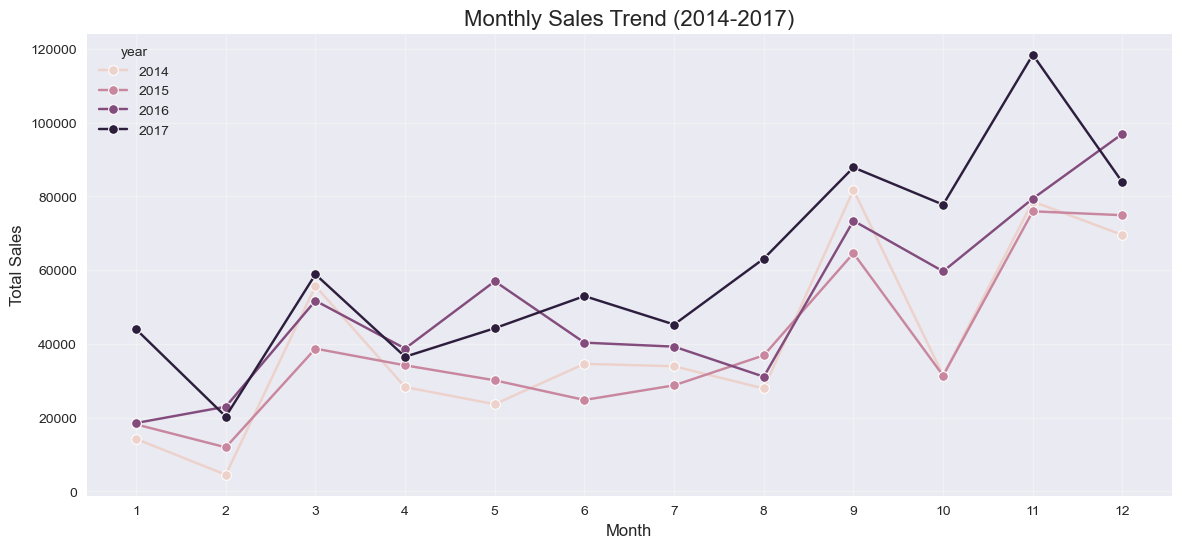

In [19]:
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x="month",y="Sales",hue="year",marker="o")

plt.title("Monthly Sales Trend (2014-2017)", fontsize=16)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Total Sales",fontsize=12)

plt.xticks(range(1,13))
plt.grid(True,alpha=0.3)
plt.show()

# Total Sales by Month

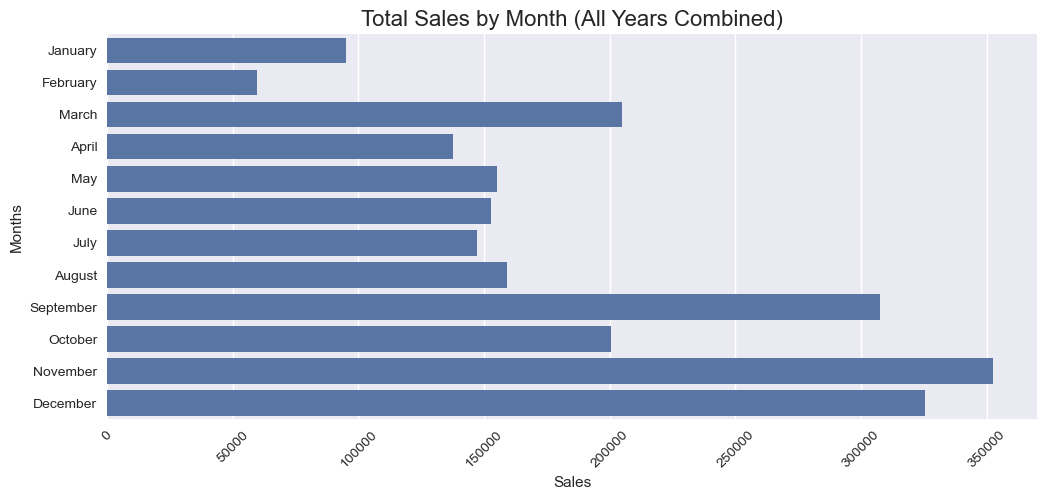

In [20]:
sales_by_month= df.groupby("month name")["Sales"].sum().reindex(["January","February","March","April","May","June","July","August","September","October","November","December"])

plt.figure(figsize=(12,5))
sns.barplot(x=sales_by_month.values,y=sales_by_month.index)
plt.xticks(rotation=45)
plt.title("Total Sales by Month (All Years Combined)",fontsize=16)
plt.ylabel("Months")
plt.xlabel("Sales")
plt.show()

# Yearly sales analysis

In [21]:
yearly_sales= df.groupby("year")["Sales"].sum().reset_index()
yearly_sales

,year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


# Plotting Yearly Sales Trend

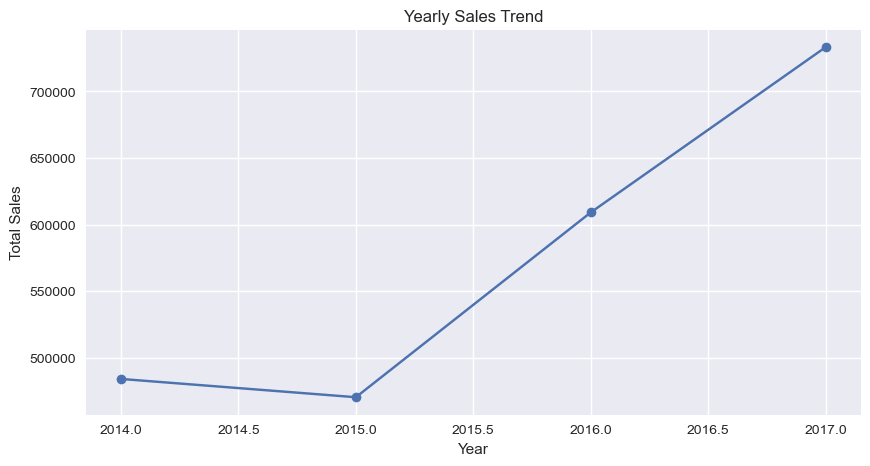

In [22]:
plt.figure(figsize=(10,5))
plt.plot(yearly_sales["year"],yearly_sales["Sales"],marker="o")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Trend")
plt.grid(True)
plt.show()

# 8. Category Analysis

In [23]:
category_performe= df.groupby("Category")[["Sales","Profit"]].sum().reset_index()
category_performe

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [24]:
category_performe.sort_values("Sales",ascending=False)

,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008


In [25]:
category_performe.sort_values("Profit",ascending=False)

,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
1,Office Supplies,719047.0320,122490.8008
0,Furniture,741999.7953,18451.2728


# Visualizing Sales and Profit

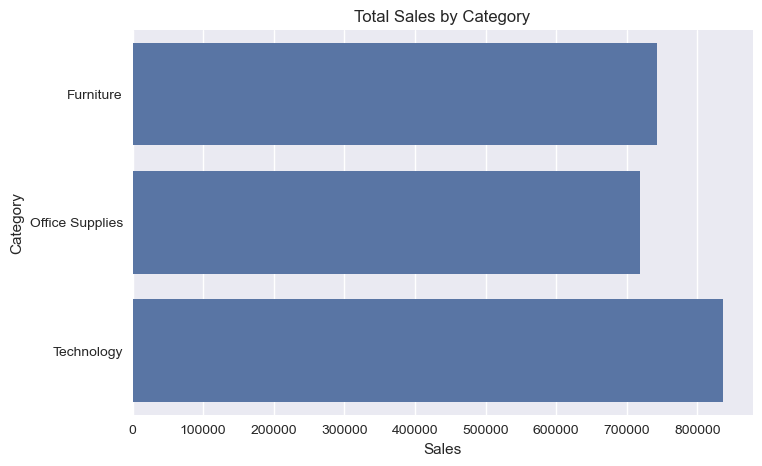

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_performe,x="Sales",y="Category")
plt.title("Total Sales by Category")
plt.xlabel("Sales")
plt.show()

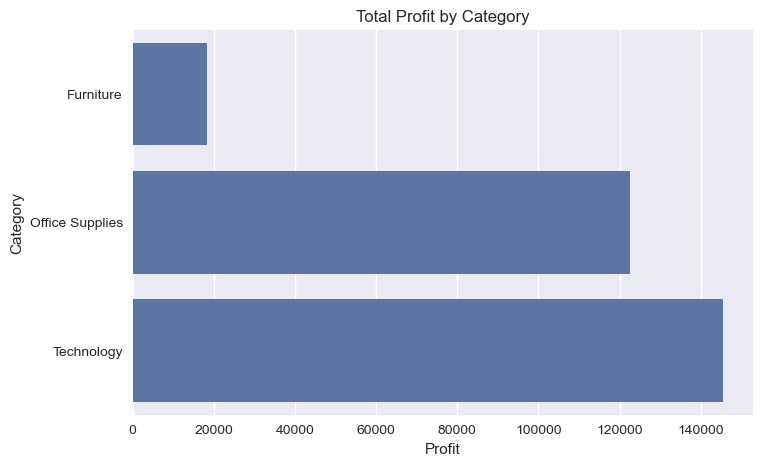

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_performe,x="Profit",y="Category")
plt.title("Total Profit by Category")
plt.xlabel("Profit")
plt.show()

# 9. Sub Category Analysis

In [28]:
subcategory= df.groupby("Sub-Category")[["Sales","Profit"]].sum().reset_index()
subcategory.head()

,Sub-Category,Sales,Profit
0,Accessories,167380.3180,41936.6357
1,Appliances,107532.1610,18138.0054
2,Art,27118.7920,6527.7870
3,Binders,203412.7330,30221.7633
4,Bookcases,114879.9963,-3472.5560


In [29]:
subcategory.sort_values(["Sales","Profit"],ascending=[False,False])

,Sub-Category,Sales,Profit
13,Phones,330007.0540,44515.7306
5,Chairs,328449.1030,26590.1663
14,Storage,223843.6080,21278.8264
16,Tables,206965.5320,-17725.4811
3,Binders,203412.7330,30221.7633
11,Machines,189238.6310,3384.7569
0,Accessories,167380.3180,41936.6357
6,Copiers,149528.0300,55617.8249
4,Bookcases,114879.9963,-3472.5560
1,Appliances,107532.1610,18138.0054


# Visualizing Top 10 Sub-Categories

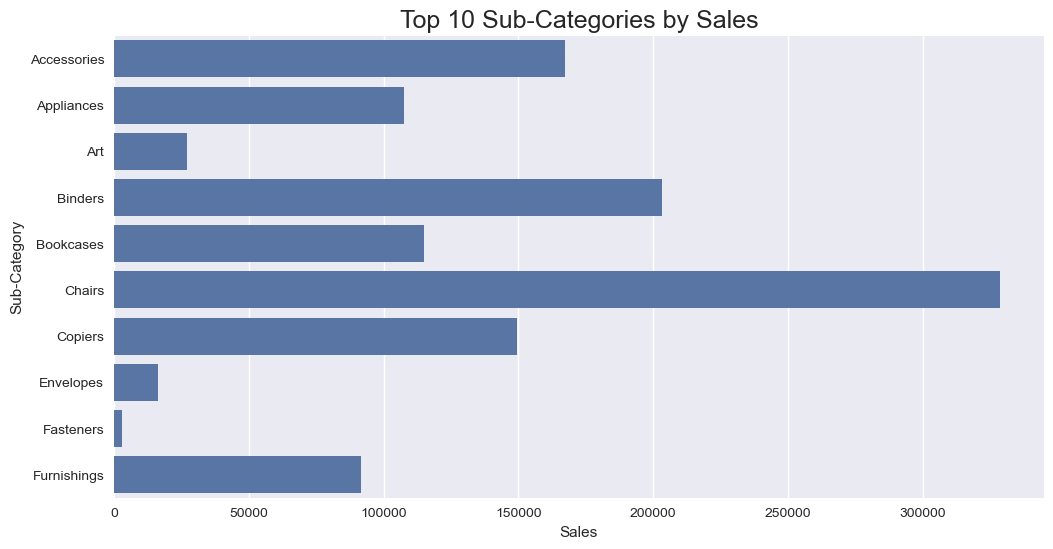

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=subcategory.head(10),x="Sales",y="Sub-Category")

plt.title("Top 10 Sub-Categories by Sales", fontsize=18)
plt.show()

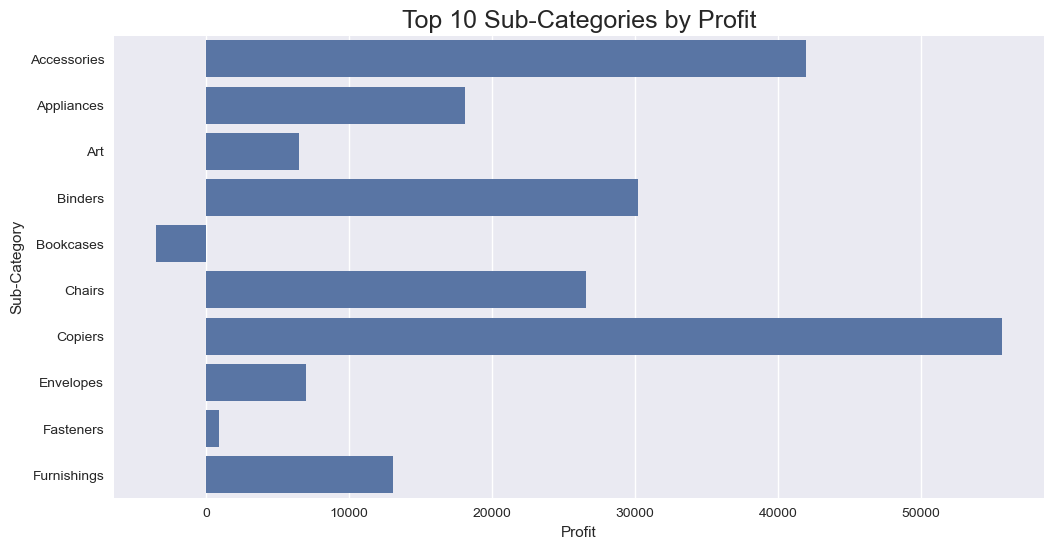

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(data=subcategory.head(10),x="Profit",y="Sub-Category")
plt.title("Top 10 Sub-Categories by Profit",fontsize=18)
plt.show()

# 10. State wise Sales and Profit Analysis

In [32]:
state_performe= df.groupby("State")[["Sales","Profit"]].sum().reset_index()
state_performe.head()

,State,Sales,Profit
0,Alabama,19510.6400,5786.8253
1,Arizona,35282.0010,-3427.9246
2,Arkansas,11678.1300,4008.6871
3,California,457687.6315,76381.3871
4,Colorado,32108.1180,-6527.8579


In [33]:
state_performe.sort_values(["Sales","Profit"],ascending=[False,False])

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563
45,Washington,138641.2700,33402.6517
36,Pennsylvania,116511.9140,-15559.9603
8,Florida,89473.7080,-3399.3017
11,Illinois,80166.1010,-12607.8870
33,Ohio,78258.1360,-16971.3766
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504


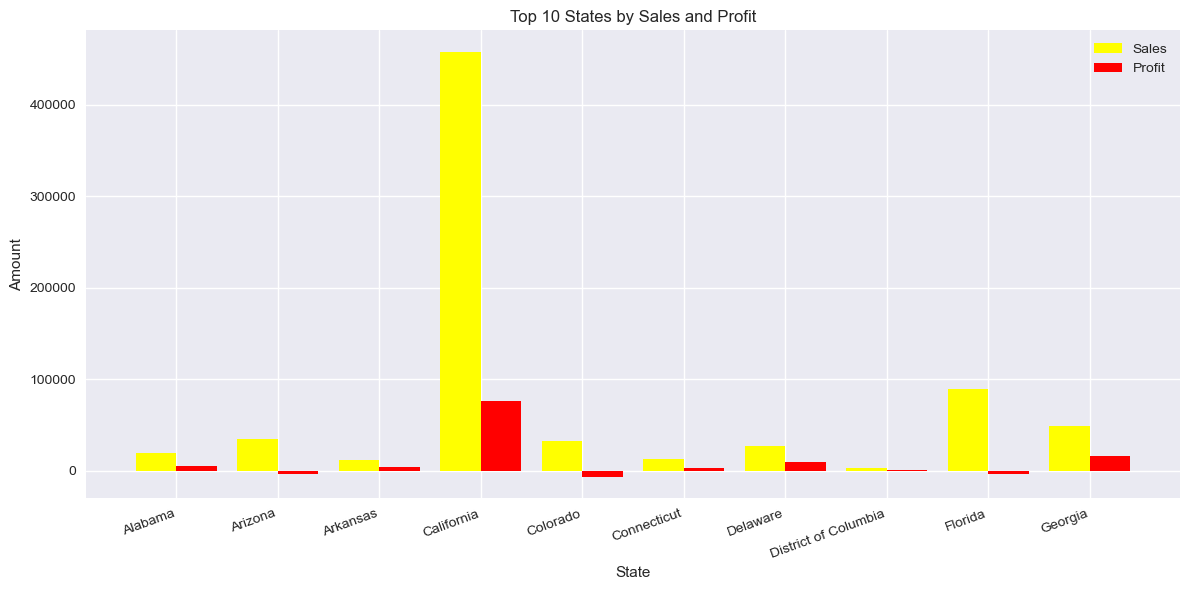

In [34]:
top_states = state_performe.head(10)
x = range(len(top_states))

plt.figure(figsize=(12, 6))
plt.bar(x,top_states["Sales"],  width=0.4, label="Sales", color="yellow")
plt.bar([i + 0.4 for i in x],top_states["Profit"], width=0.4, label="Profit", color="red")
plt.xticks([i + 0.2 for i in x], top_states["State"], rotation=20, ha="right")

plt.title("Top 10 States by Sales and Profit")
plt.xlabel("State")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()


# Regional Analysis


In [35]:
region_performe= df.groupby("Region")[["Sales","Profit"]].sum().reset_index()
region_performe

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


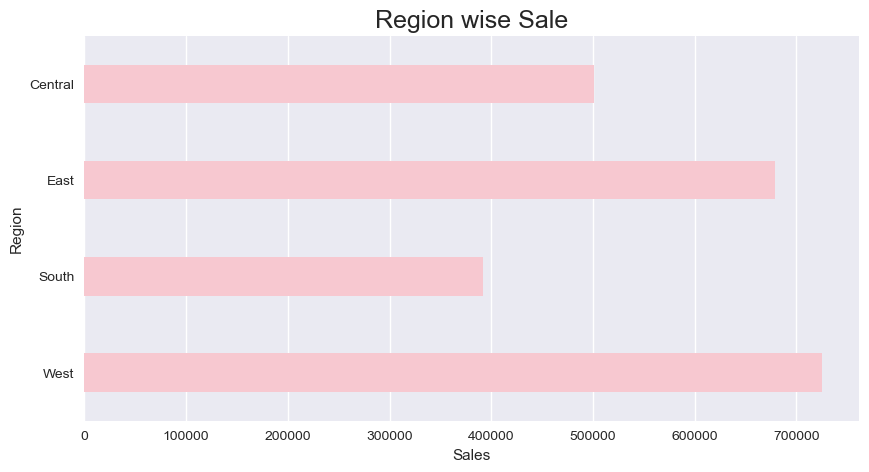

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=region_performe,x="Sales",y="Region",color="pink", width=0.4)
plt.title("Region wise Sale", fontsize=18)
plt.show()

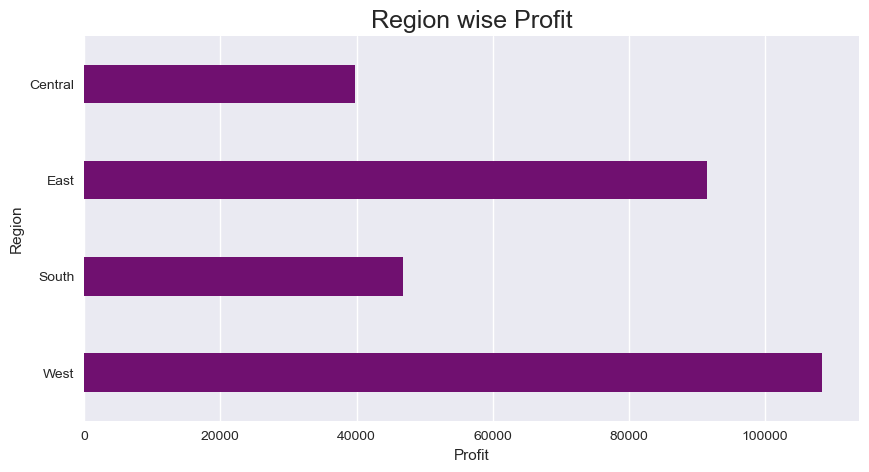

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=region_performe,x="Profit",y="Region",color="purple", width=0.4)
plt.title("Region wise Profit", fontsize=18)
plt.show()

# Customer Segment Analysis

In [38]:
segment= df.groupby("Segment")[["Sales","Profit"]].sum().reset_index()
segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


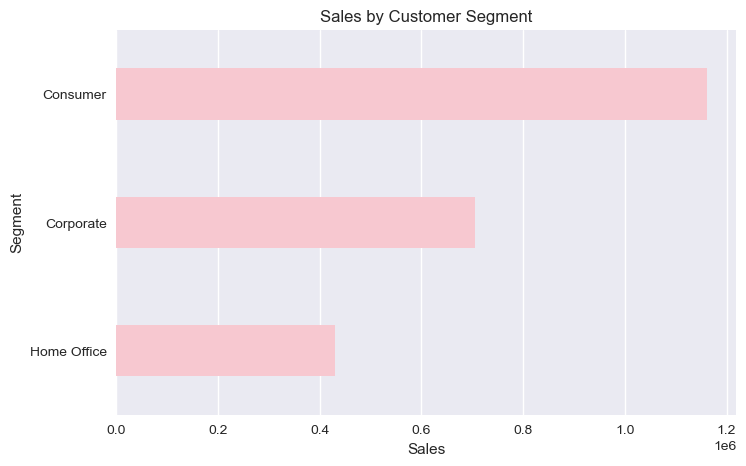

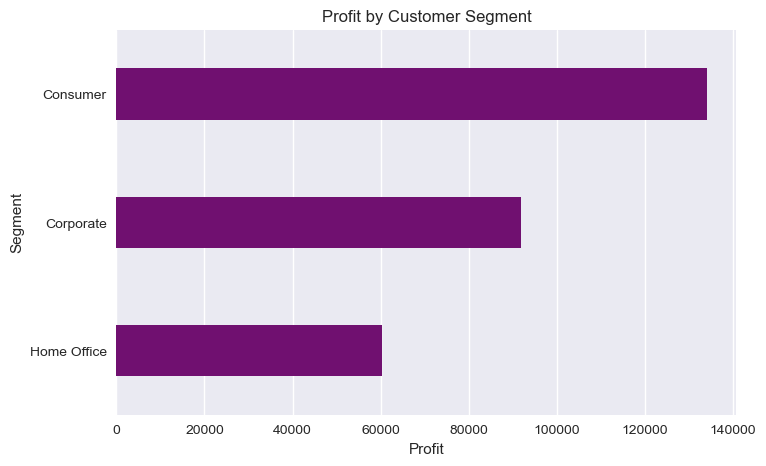

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x="Sales",y="Segment", data=segment, width=0.4, color="pink")
plt.title("Sales by Customer Segment")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Profit",y="Segment",  data=segment, width=0.4, color="purple")
plt.title("Profit by Customer Segment")
plt.show()


# Discount Impact Analysis

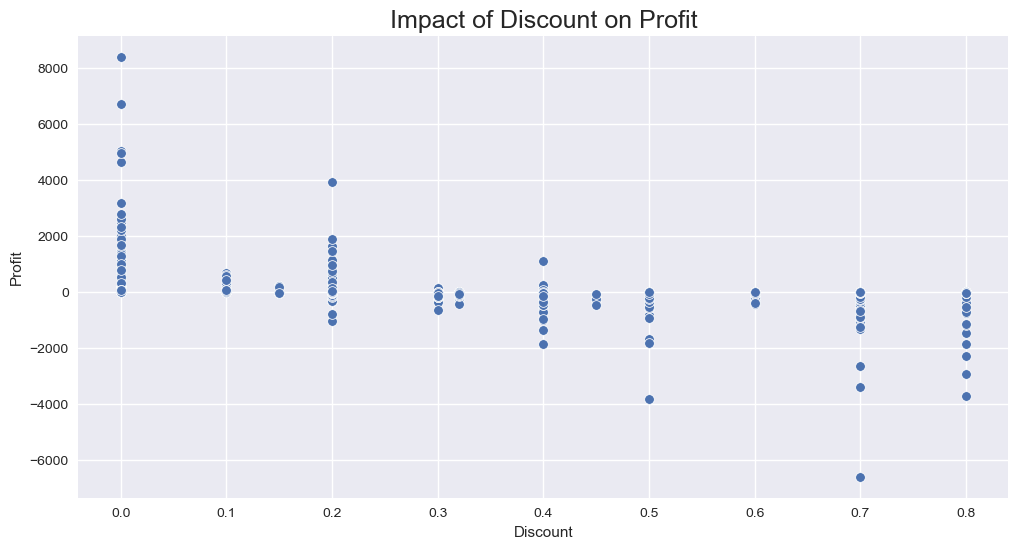

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Discount",y="Profit")
plt.title("Impact of Discount on Profit", fontsize=18)
plt.grid(True)
plt.show()

# Customer Analysis (TOP 10)

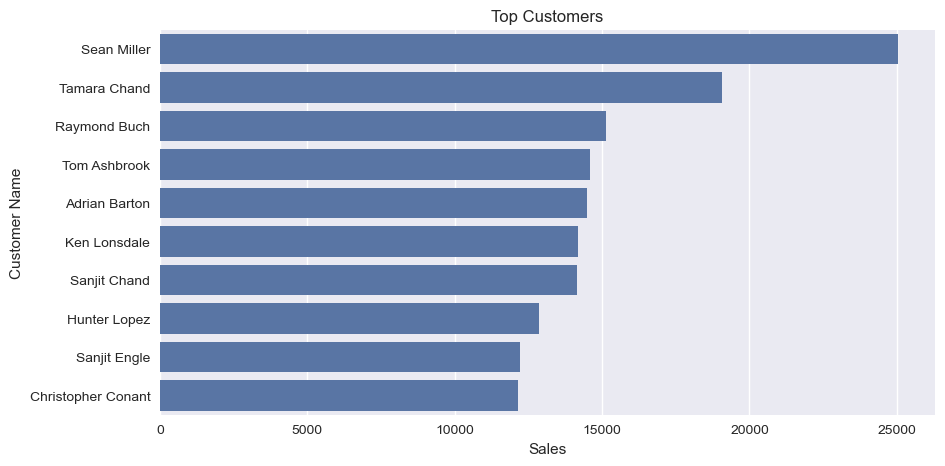

In [41]:
top_cus= df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_cus.head(10),x="Sales",y="Customer Name")
plt.title("Top Customers")
plt.show()

# Shipping Mode Sales and Profit Comparison

In [42]:
ship= df.groupby("Ship Mode")[["Sales","Profit"]].sum().sort_values("Sales",ascending=False).reset_index()
ship

,Ship Mode,Sales,Profit
0,Standard Class,1.358216e+06,164088.7875
1,Second Class,4.591936e+05,57446.6354
2,First Class,3.514284e+05,48969.8399
3,Same Day,1.283631e+05,15891.7589


<Figure size 1000x500 with 0 Axes>

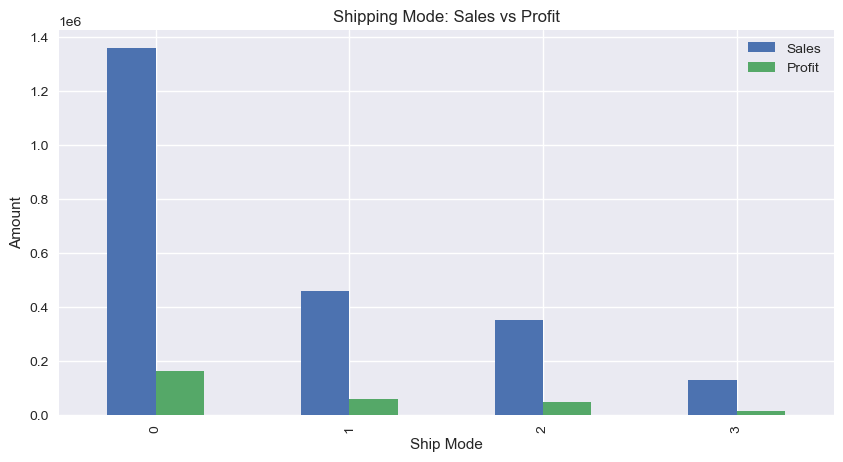

In [48]:

plt.figure(figsize=(10,5))
ship.plot(kind="bar", figsize=(10,5))
plt.title("Shipping Mode: Sales vs Profit")
plt.xlabel("Ship Mode")
plt.ylabel("Amount")
plt.grid(True)
plt.show()


# Product Analysis

# Top 10 Products by Sales

In [50]:
top_products= df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10).reset_index()
top_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


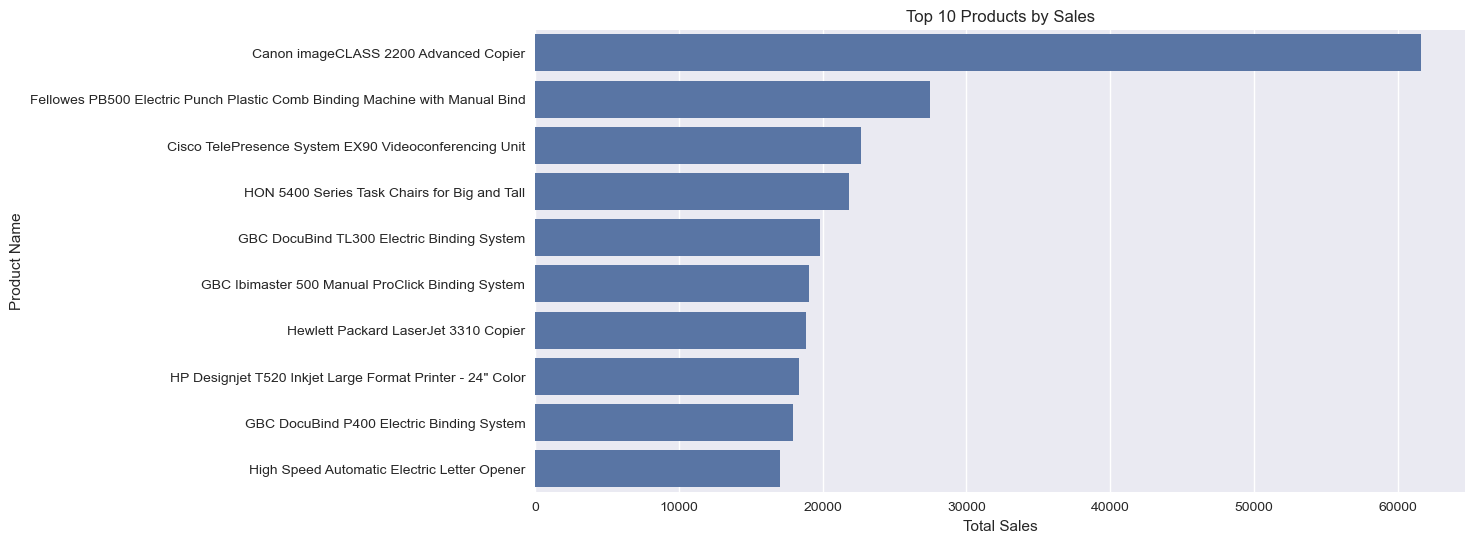

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_products.head(10),y="Product Name",x="Sales")
plt.title("Top 10 Products by Sales")
plt.ylabel("Product Name")
plt.xlabel("Total Sales")
plt.show()

# Top 10 Products by Profit

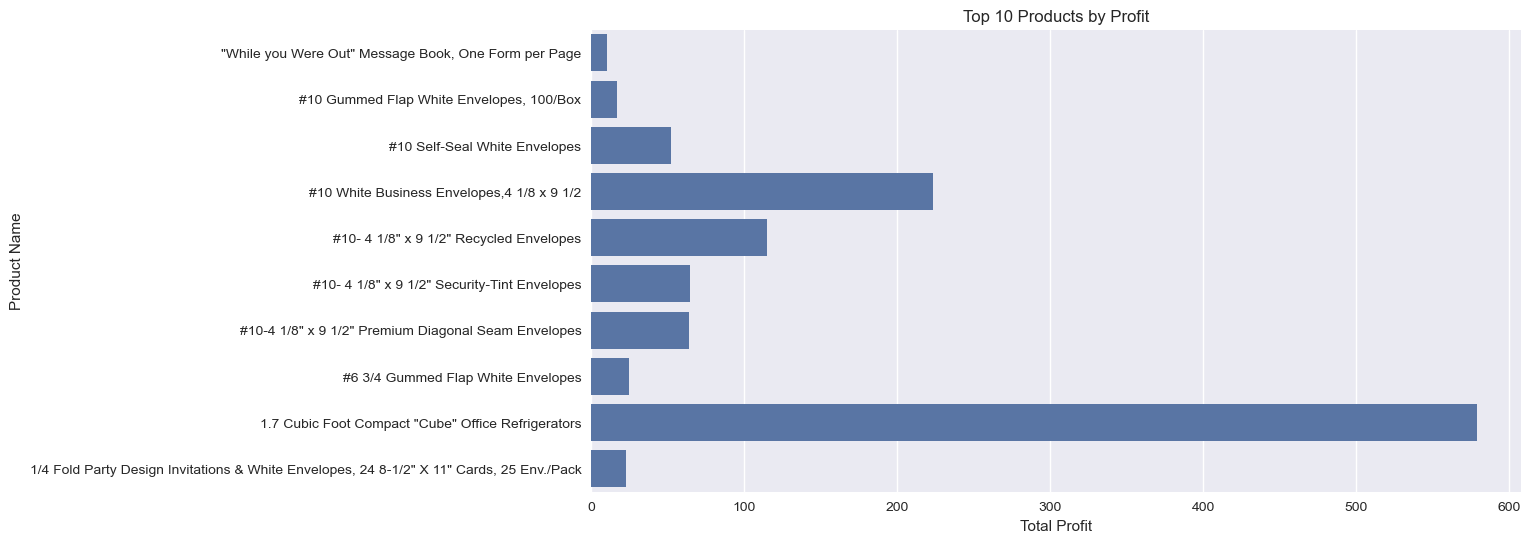

In [58]:
top_profit=df.groupby("Product Name")["Profit"].sum().head(10)
top_profit.sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y=top_profit.index,x=top_profit.values)
plt.ylabel("Product Name")
plt.xlabel("Total Profit")
plt.title("Top 10 Products by Profit")
plt.show()